# Signal Processing III (Fourier Series)
Author: Chul Min Yeum  
Email: cmyeum@uwaterloo.ca  

Last updated: 2023-10-06

## Table of Contents
* Time Shifting
* Convotluion 1 (Square Wave)
* Convotluion 2 (Damped Symmetrically Oscillating Function)
* Effects of Windowing on the Frequency Signal (Modulus)
* Fourier Transform of a Discrete Signal
* Digital Signal
* Discrete Fourier Transform
* Zero-Padding Example (resolution)
* Zero-padding (near resonance)

# Time Shifting
$ x(t) = 
\begin{cases} 
2 & \text{if } -1 < t < 1 \\
0 & \text{otherwise}
\end{cases} $


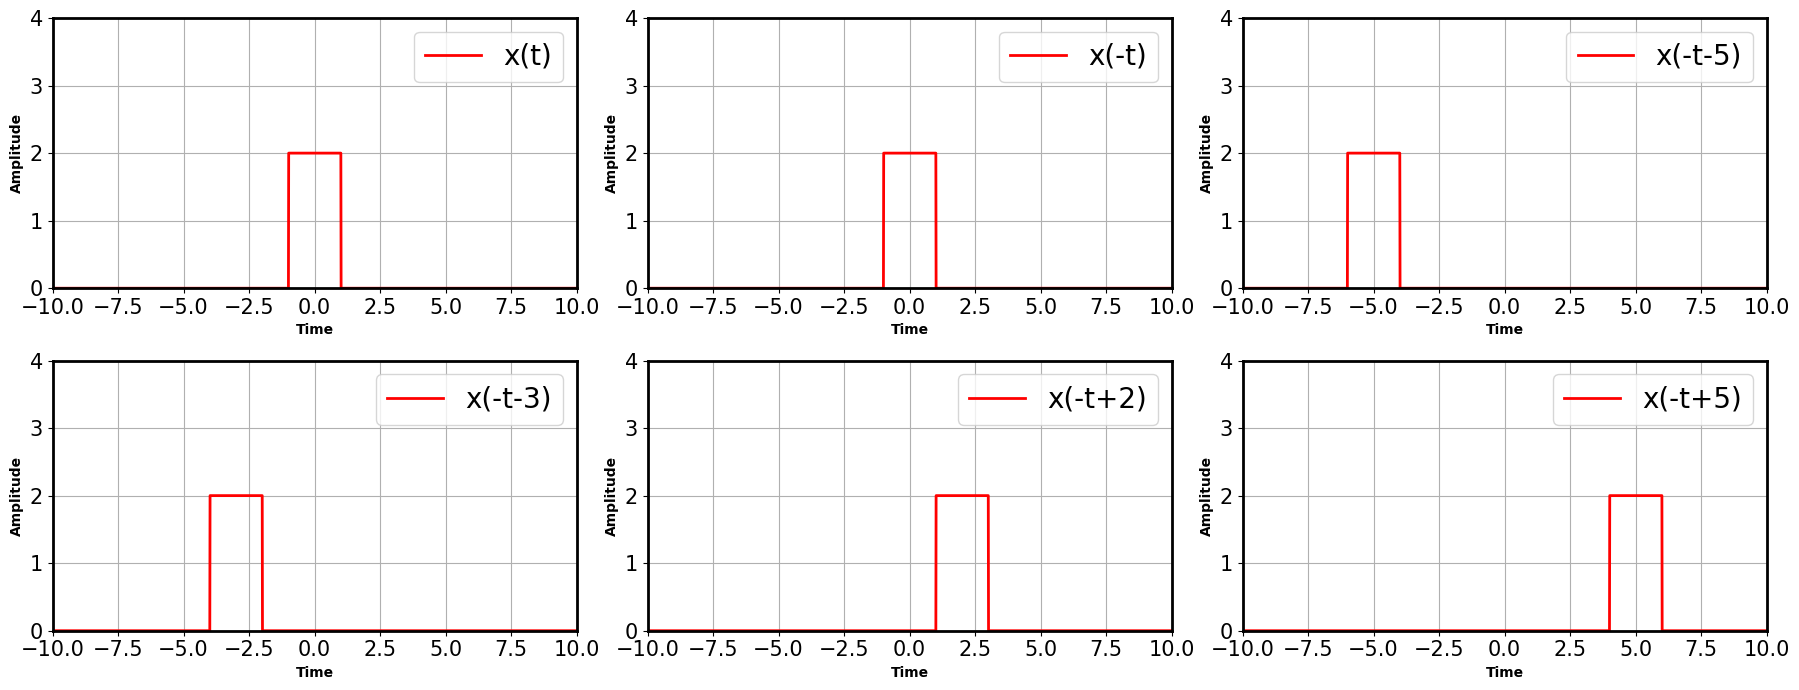

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the square wave
def sig1(t, a=2, b=1):
    return a * np.where(np.abs(t) <= b, 1, 0)

# Create time values
t = np.arange(-10, 10, 0.01)

# Initialize the figure
fig, axs = plt.subplots(2, 3, figsize=(18, 7))

# List of operations to perform on the signal
operations = [lambda t: t,
              lambda t: -t,
              lambda t: -t - 5,
              lambda t: -t - 3,
              lambda t: -t + 2,
              lambda t: -t + 5]

# List of titles for each subplot
titles = ['x(t)', 'x(-t)', 'x(-t-5)', 'x(-t-3)', 'x(-t+2)', 'x(-t+5)']

# Plot the signals based on the operations
for ax, operation, title in zip(axs.ravel(), operations, titles):
    ax.plot(t, sig1(operation(t)), '-r', linewidth=2)
    ax.legend([title], fontsize=20)
    ax.grid(True)
    ax.set_xlim([-10, 10])
    ax.set_ylim([0, 4])
    ax.set_xlabel("Time", fontweight='bold')
    ax.set_ylabel("Amplitude", fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=15)
    for spine in ax.spines.values():
        spine.set_linewidth(2)

# Adjust layout
plt.tight_layout()
plt.show()


# Convotluion 1 (Square Wave)

$
h(t) = 
\begin{cases} 
3 & \text{if } -3 \leq t < 3 \\
0 & \text{otherwise}
\end{cases}
$

$
x(t) = 
\begin{cases} 
2 & \text{if } -1 < t < 1 \\
0 & \text{otherwise}
\end{cases}
$


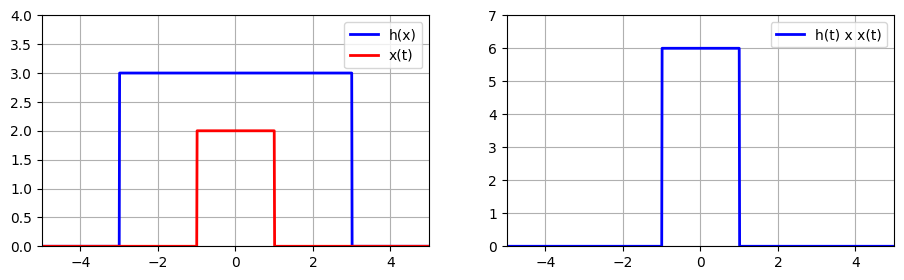

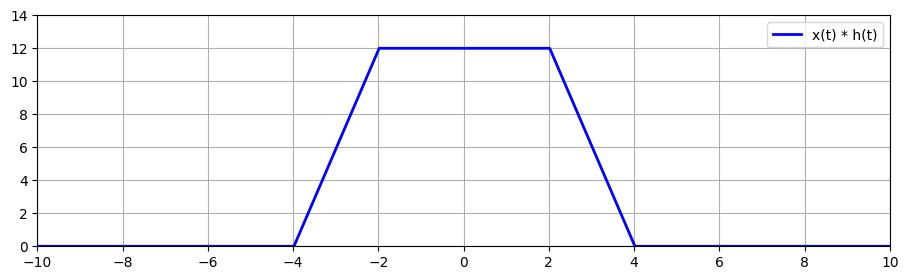

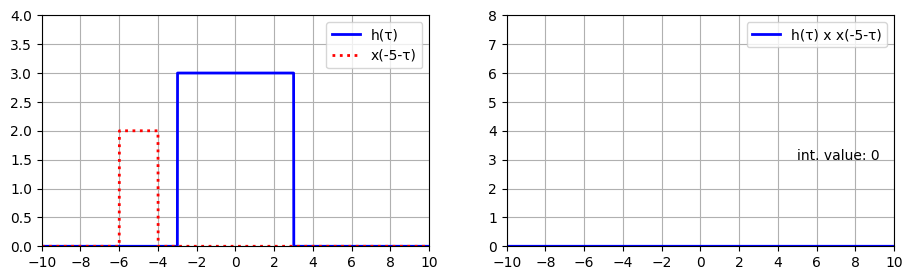

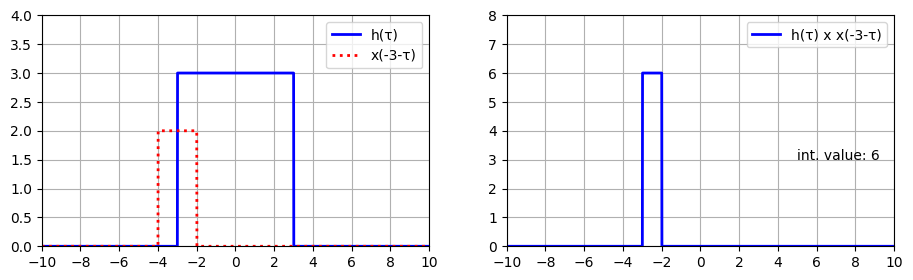

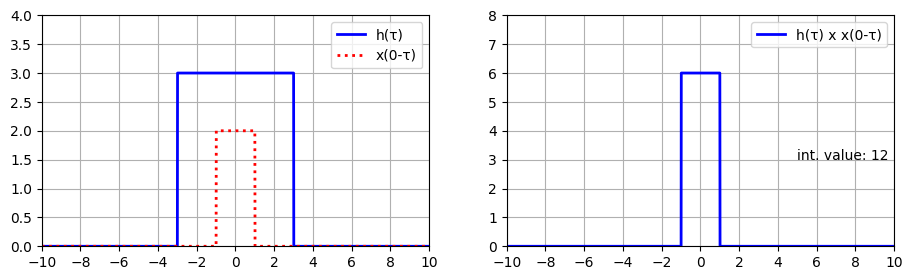

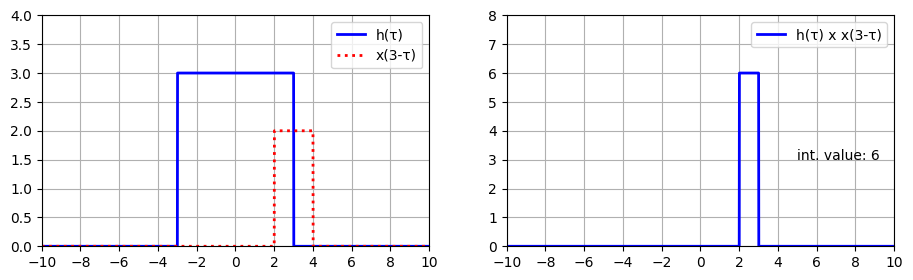

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator
from scipy.integrate import trapz 

# Define the signal functions
def ht(t, a=3, b=3): # h(t)
    return a * (np.abs(t) <= b)

def xt(t, a=2, b=1): # x(t)
    return a * (np.abs(t) <= b)

# Time vector
t = np.arange(-10, 10, 0.01)

# Plotting x(t) and h(t)
fig1, ax1 = plt.subplots(1, 2, figsize=(11, 3))
ax1[0].plot(t, ht(t), '-b', linewidth=2, label='h(x)')
ax1[0].plot(t, xt(t), '-r', linewidth=2, label='x(t)')
ax1[0].legend()
ax1[0].set_ylim([0, 4])
ax1[0].set_xlim([-5, 5])
ax1[0].grid(True)

ax1[1].plot(t, ht(t) * xt(t), '-b', linewidth=2, label='h(t) x x(t)')
ax1[1].legend()
ax1[1].set_ylim([0, 7])
ax1[1].set_xlim([-5, 5])
ax1[1].grid(True)

# Convolution operation
convolution = np.convolve(ht(t), xt(t), 'same') * 0.01
fig2, ax2 = plt.subplots(1, 1, figsize=(11, 3))
ax2.plot(t, convolution, '-b', linewidth=2, label='x(t) * h(t)')
ax2.legend()
ax2.set_ylim([0, 14])
ax2.set_xlim([-10, 10])
ax2.xaxis.set_major_locator(MultipleLocator(2))
ax2.grid(True)

# Create figures for shifting operations
shift_values = [-5, -3, 0, 3]
for shift in shift_values:
    fig, ax = plt.subplots(1, 2, figsize=(11, 3))
    
    ax[0].plot(t, ht(t), '-b', linewidth=2, label='h(τ)')
    ax[0].plot(t, xt(shift - t), ':r', linewidth=2, label=f'x({shift}-τ)')
    ax[0].legend()
    ax[0].set_ylim([0, 4])
    ax[0].set_xlim([-10, 10])
    ax[0].xaxis.set_major_locator(MultipleLocator(2))
    ax[0].grid(True)

    ax[1].plot(t, ht(t) * xt(shift - t), '-b', linewidth=2, label=f'h(τ) x x({shift}-τ)')

    integral_sig = trapz(ht(t) * xt(shift - t), t)
    ax[1].text(5, 3, 'int. value: ' + str(round(integral_sig)), fontsize = 10) 

    ax[1].legend()
    ax[1].set_ylim([0, 8])
    ax[1].set_xlim([-10, 10])
    ax[1].xaxis.set_major_locator(MultipleLocator(2))
    ax[1].grid(True)
    

plt.show()


# Convotluion 2 (Damped Symmetrically Oscillating Function)

$x_1(t) = e^{-a|t|}$  
$x_2(t) = \cos(2\pi f_0 t)$  
$x(t) = x_1(t)x_2(t) = e^{-a|t|}\cos(2\pi f_0 t)$  


<module 'matplotlib.pyplot' from 'C:\\Users\\cmyeum\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

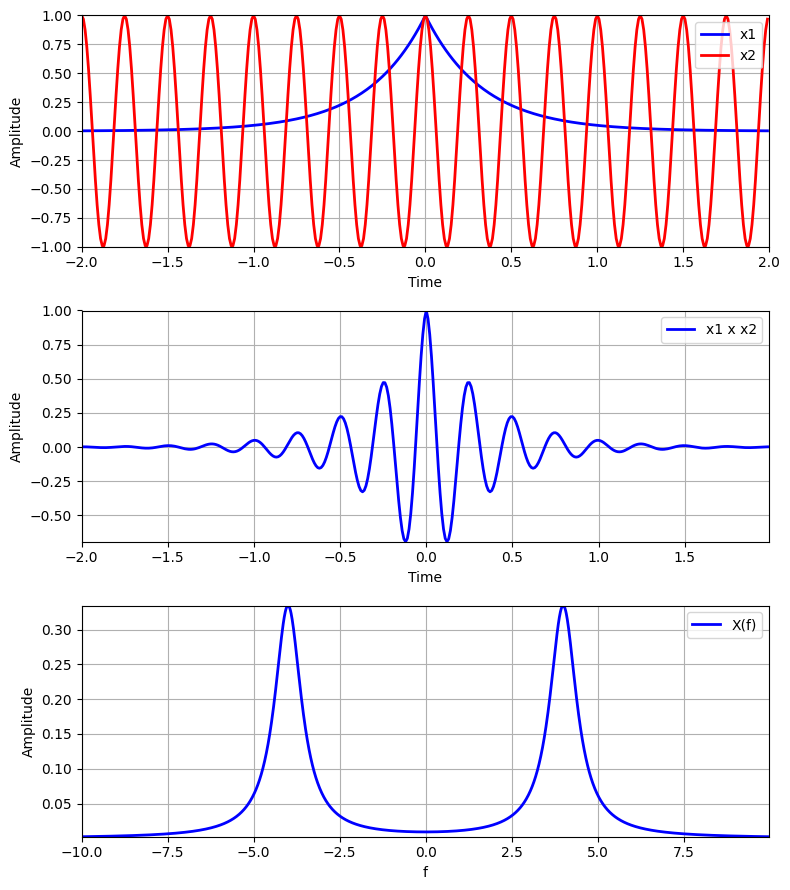

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Given constants
a = 3
f0 = 4

# Defining functions
x1 = lambda t: np.exp(-a * np.abs(t))
x2 = lambda t: np.cos(2 * np.pi * f0 * t)
x = lambda t: x1(t) * x2(t)

def X1f(f):
    val_real = quad(lambda t: np.real(x(t) * np.exp(-1j * 2 * np.pi * f * t)), -np.inf, np.inf, limit=100)[0]
    val_imag = quad(lambda t: np.imag(x(t) * np.exp(-1j * 2 * np.pi * f * t)), -np.inf, np.inf, limit=100)[0]
    return val_real + 1j*val_imag

# Values for t and f
t = np.arange(-2, 2, 0.01)
f = np.arange(-10, 10, 0.01) + np.finfo(float).eps

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(8, 9))

# Plot for x1 and x2
ax[0].plot(t, x1(t), '-b', linewidth=2, label='x1')
ax[0].plot(t, x2(t), '-r', linewidth=2, label='x2')
ax[0].legend()
ax[0].set_ylim([-1, 1])
ax[0].set_xlim([-2, 2])
ax[0].grid(True)
ax[0].set_ylabel('Amplitude')
ax[0].set_xlabel('Time')

# Plot for x1*x2
ax[1].plot(t, x3(t), '-b', linewidth=2, label='x1 x x2')
ax[1].legend()
ax[1].set_ylim([-1, 1])
ax[1].set_xlim([-2, 2])
ax[1].grid(True)
ax[1].set_ylabel('Amplitude')
ax[1].set_xlabel('Time')
ax[1].autoscale(enable=True, axis='both', tight=True)

# Plot for X(f)
X1f_values = np.array([X1f(freq) for freq in f])
ax[2].plot(f, np.abs(X1f_values), '-b', linewidth=2, label='X(f)')
ax[2].legend()
ax[2].grid(True)
ax[2].set_ylabel('Amplitude')
ax[2].set_xlabel('f')
ax[2].autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()
plt


# Effects of Windowing on the Frequency Signal (Modulus)

![Alt text](image.png)


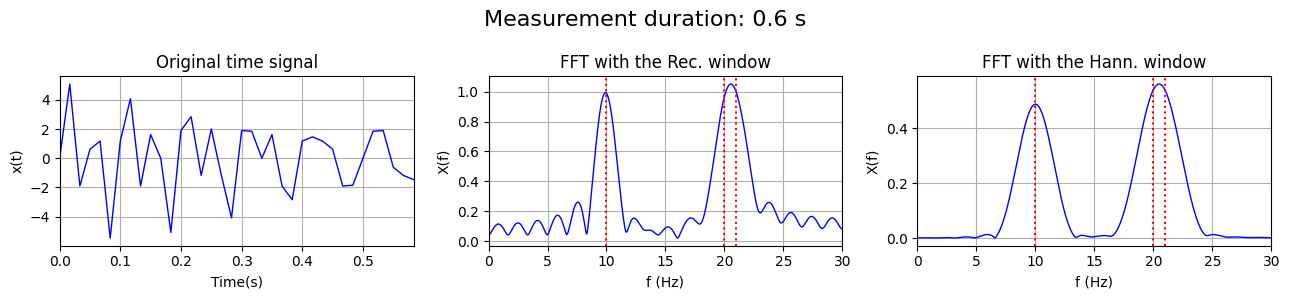

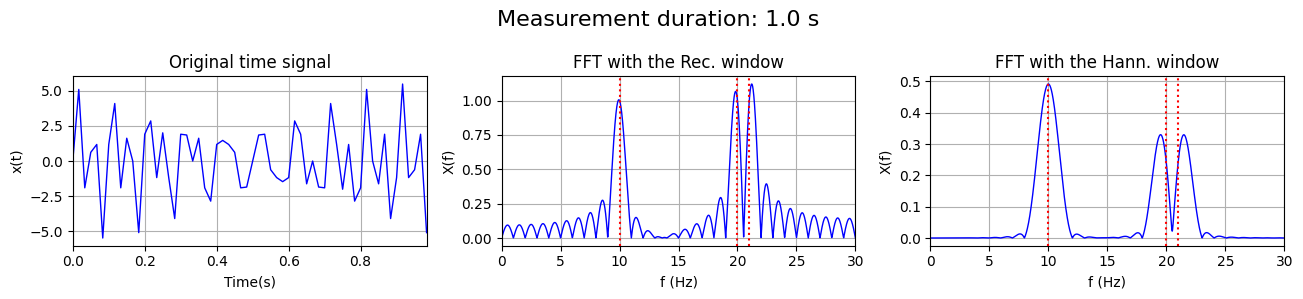

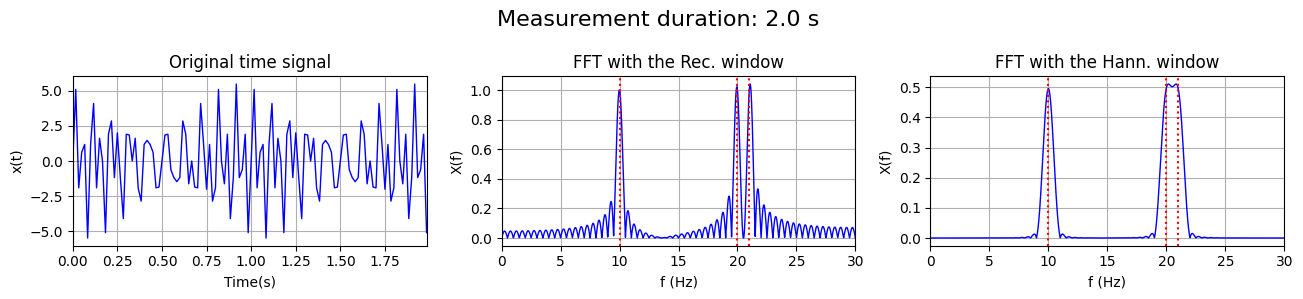

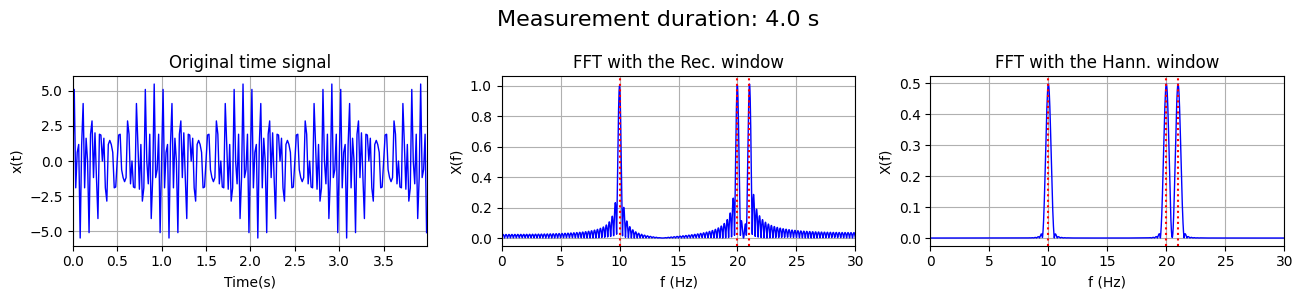

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def hann_rect_window_example(T):
    
    f1, f2, f3 = 10, 20, 21 # three frequency components in x(t)
    fs = 60 # sampling frequency

    t = np.arange(0, T, 1/fs)
    x = 2*np.sin(2*np.pi*f1*t) + 2*np.sin(2*np.pi*f2*t) + 2*np.sin(2*np.pi*f3*t)
    

    N = len(x)
    nfft = 4096
    
    whan = np.hanning(N) # hanning window
    xhann = x * whan

    Xz = np.fft.fft(xhann, nfft) # frequecy signal
    Nz = len(Xz)
    fz = fs * np.arange(Nz) / Nz 

    hannf = {
        "Xz": Xz,
        "fz": fz,
        "Nz": Nz
    }

    wrect = np.ones(N) # rectangular window
    xrect = x * wrect
    
    Xz = np.fft.fft(xrect, nfft) # frequency signal
    Nz = len(Xz)
    fz = fs * np.arange(Nz) / Nz

    rectwf = {
        "Xz": Xz,
        "fz": fz,
        "Nz": Nz
    }

    return {"x": x, "t": t}, hannf, rectwf, fs

def plot_example(T):
    sig, hannf, rectwf, fs = hann_rect_window_example(T)
    
    fig, ax = plt.subplots(1, 3, figsize=(13, 3))
    
    fig.suptitle('Measurement duration: %0.1f s' % T, fontsize=16)

    ax[0].plot(sig['t'], sig['x'], 'b', linewidth=1)
    ax[0].grid(True)
    ax[0].set_title('Original time signal')
    ax[0].set_ylabel('x(t)')
    ax[0].set_xlabel('Time(s)')
    ax[0].autoscale(enable=True, axis='x', tight=True)

    ax[1].plot(rectwf['fz'][:rectwf['Nz']//2+1], np.abs(rectwf['Xz'][:rectwf['Nz']//2+1])/fs/T, 'b', linewidth=1)
    ax[1].axvline(x=10, color='r', linestyle=':')
    ax[1].axvline(x=20, color='r', linestyle=':')
    ax[1].axvline(x=21, color='r', linestyle=':')
    ax[1].set_title('FFT with the Rec. window')
    ax[1].grid(True)
    ax[1].set_ylabel('X(f)')
    ax[1].set_xlabel('f (Hz)')
    ax[1].autoscale(enable=True, axis='x', tight=True)

    ax[2].plot(hannf['fz'][:hannf['Nz']//2+1], np.abs(hannf['Xz'][:hannf['Nz']//2+1])/fs/T, 'b', linewidth=1)
    ax[2].axvline(x=10, color='r', linestyle=':')
    ax[2].axvline(x=20, color='r', linestyle=':')
    ax[2].axvline(x=21, color='r', linestyle=':')
    ax[2].set_title('FFT with the Hann. window')
    ax[2].grid(True)
    ax[2].set_ylabel('X(f)')
    ax[2].set_xlabel('f (Hz)')
    ax[2].autoscale(enable=True, axis='x', tight=True)

    plt.tight_layout()
    plt.show()

for T in [0.6, 1, 2, 4]:
    plot_example(T)


# Fourier Transform of a Discrete Signal

Time signal: $x(t) = e^{-a|t|} \cos(2\pi f_0 t)$

Frequency signal: $X(f) = \frac{a}{a^2 + [2\pi(f - f_0)]^2} + \frac{a}{a^2 + [2\pi(f + f_0)]^2}$

**Link Between Fourier Transform of a Discrete Sequence and Continuous Signal**

$X_s(f) = \frac{1}{\Delta} \sum_{n=-\infty}^{\infty} X \left( f - \frac{n}{\Delta} \right) = f_s \sum_{n=-\infty}^{\infty} X(f - nf_s)$


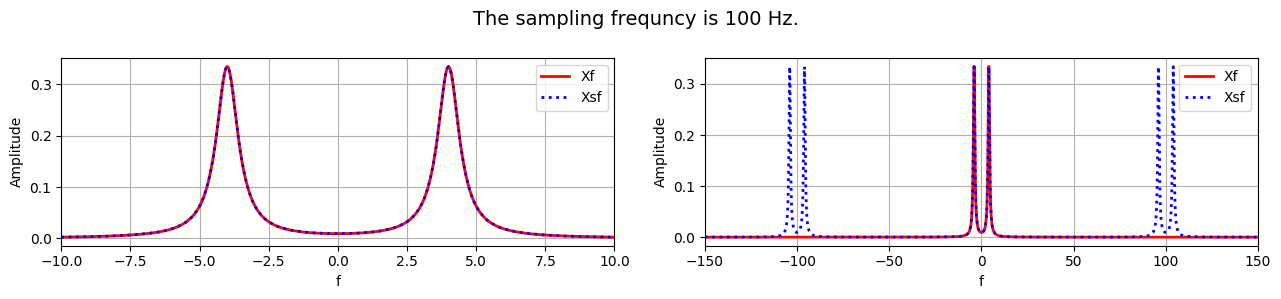

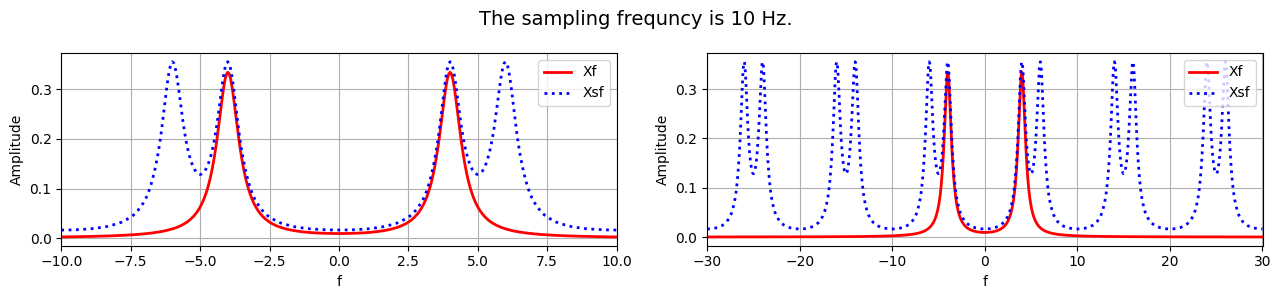

In [52]:
import numpy as np
import matplotlib.pyplot as plt

a = 3
f0 = 4

# Define functions
x1 = lambda t: np.exp(-a * np.abs(t))
x2 = lambda t: np.cos(2 * np.pi * f0 * t)
x = lambda t: x1(t) * x2(t)

# Define Xf and Xsf for a given fs and t
def define_functions(fs, t):
    xn = x(t) # t is n * delta
    Xf = lambda f: a / (a**2 + (2 * np.pi * (f - f0))**2) + a / (a**2 + (2 * np.pi * (f + f0))**2)
    Xsf = lambda f: (1/fs) * np.sum(xn * np.exp(-1j * 2 * np.pi * f * t))
    return Xf, Xsf

# Plot for given fs, t, and figure number
def plot(fs, t, fig_num):
    Xf, Xsf = define_functions(fs, t)

    fig, ax = plt.subplots(1, 2, figsize=(13, 3))
    
    fig.suptitle('The sampling frequncy is %d Hz.' % fs, fontsize=14)

    # First subplot
    f = np.arange(-10, 10.05, 0.05)
    ax[0].plot(f, np.abs(np.vectorize(Xf)(f)), '-r', linewidth=2)
    ax[0].plot(f, np.abs(np.vectorize(Xsf)(f)), ':b', linewidth=2)
    ax[0].legend(['Xf', 'Xsf'], loc = 1)
    ax[0].grid(True)
    ax[0].set_ylabel('Amplitude')
    ax[0].set_xlabel('f')
    ax[0].autoscale(enable=True, axis='x', tight=True)

    # Second subplot
    if fig_num == 1:
        f = np.arange(-150, 150.05, 0.05)
    else:
        f = np.arange(-30, 30.05, 0.05)
    
    ax[1].plot(f, np.abs(np.vectorize(Xf)(f)), '-r', linewidth=2)
    ax[1].plot(f, np.abs(np.vectorize(Xsf)(f)), ':b', linewidth=2)
    ax[1].legend(['Xf', 'Xsf'], loc = 1)
    ax[1].grid(True)
    ax[1].set_ylabel('Amplitude')
    ax[1].set_xlabel('f')
    ax[1].autoscale(enable=True, axis='x', tight=True)

    plt.tight_layout()
    plt.show()

# Plot for fs = 100: low sampling frequency 
fs = 100
dt = 1/fs
t = np.arange(-2, 2, dt)
plot(fs, t, 1)

# Plot for fs = 10: low sampling frequency 
fs = 10  
dt = 1/fs
t = np.arange(-2, 2, dt)
plot(fs, t, 2)


# Digital Signal

Fourier transform of a **continuous** time signal 𝑥(𝑡)  
$$X(f) = \int_{-\infty}^{\infty} x(t)e^{-i2\pi ft} \, dt$$

Fourier transform of a **discrete** sequence 𝑥(𝑛∆)  
$$X_s(f) = \sum_{n=-\infty}^{\infty} x(n\Delta)e^{-i2\pi fn\Delta}$$

Fourier transform of a **discrete finite** sequence 𝑥(𝑛)  
$$X_s(f) = \sum_{n=0}^{N-1} x(n)e^{-i2\pi fn\Delta}$$



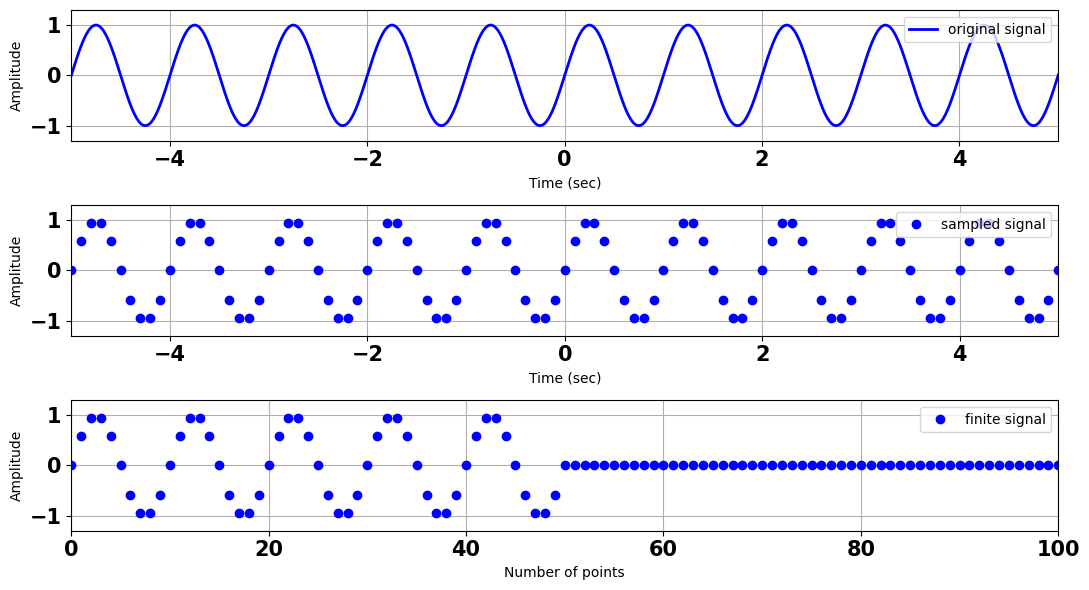

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Definitions
f = 1
y = lambda t: np.sin(2*np.pi*f*t)

# Sampling
ncyle = 5

fs1 = 1000 # high sampling frequency
t1 = np.arange(-ncyle, ncyle + 1/fs1, 1/fs1)
y1 = y(t1)

fs2 = 10 # low sampling frequency
t2 = np.arange(-ncyle, ncyle + 1/fs2, 1/fs2)
y2 = y(t2)

y3 = np.array(y2, copy=True)
y3[int(len(y3)/2):] = 0

# Plotting
plt.figure(figsize=(11, 6))

# Original signal
plt.subplot(3, 1, 1)
plt.plot(t1, y1, '-b', linewidth=2)
plt.legend(['original signal'], loc=1)
plt.axis('tight')
plt.grid(True)
plt.ylabel('Amplitude')
plt.ylim([-1.3, 1.3])
plt.xlabel('Time (sec)')
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.autoscale(enable=True, axis='x', tight=True)

# Sampled signal
plt.subplot(3, 1, 2)
plt.plot(t2, y2, 'ob', linewidth=2)
plt.legend(['sampled signal'], loc=1)
plt.axis('tight')
plt.grid(True)
plt.ylabel('Amplitude')
plt.ylim([-1.3, 1.3])
plt.xlabel('Time (sec)')
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.autoscale(enable=True, axis='x', tight=True)

# Finite signal
plt.subplot(3, 1, 3)
plt.plot(y3, 'ob', linewidth=2)
plt.legend(['finite signal'], loc=1)
plt.axis('tight')
plt.grid(True)
plt.ylabel('Amplitude')
plt.ylim([-1.3, 1.3])
plt.xlabel('Number of points')
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()


# Discrete Fourier Transform
![Alt text](image-1.png)

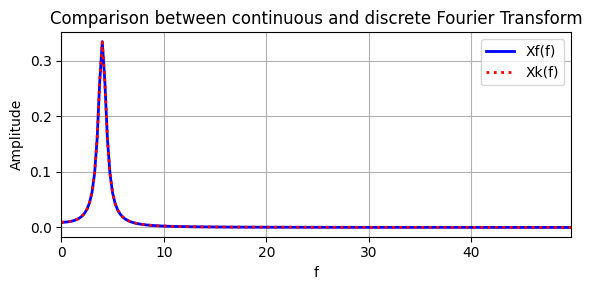

In [64]:
import numpy as np
import matplotlib.pyplot as plt

a = 3
f0 = 4

# Define functions
x1 = lambda t: np.exp(-a * np.abs(t))
x2 = lambda t: np.cos(2 * np.pi * f0 * t)
x = lambda t: x1(t) * x2(t)

fs = 100
dt = 1/fs
t = np.arange(-2, 2, dt)
xn = x(t) # sampling

# Define Xf function
Xf = lambda f: a / (a**2 + (2 * np.pi * (f - f0))**2) \
      + a / (a**2 + (2 * np.pi * (f + f0))**2)

# Perform FFT
nfft = len(xn)
Xk = np.fft.fft(xn, nfft)

f = 1 / (nfft * dt) * np.arange(nfft//2)

# Plotting
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(f, np.abs(np.vectorize(Xf)(f)), '-b', linewidth=2)
ax.plot(f, (1/fs) * np.abs(Xk[:nfft//2]), ':r', linewidth=2)
ax.legend(['Xf(f)', 'Xk(f)'])
ax.grid(True)
ax.set_ylabel('Amplitude')
ax.set_xlabel('f')
ax.set_title('Comparison between continuous and discrete Fourier Transform')
ax.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()


# Zero-Padding Example (resolution)


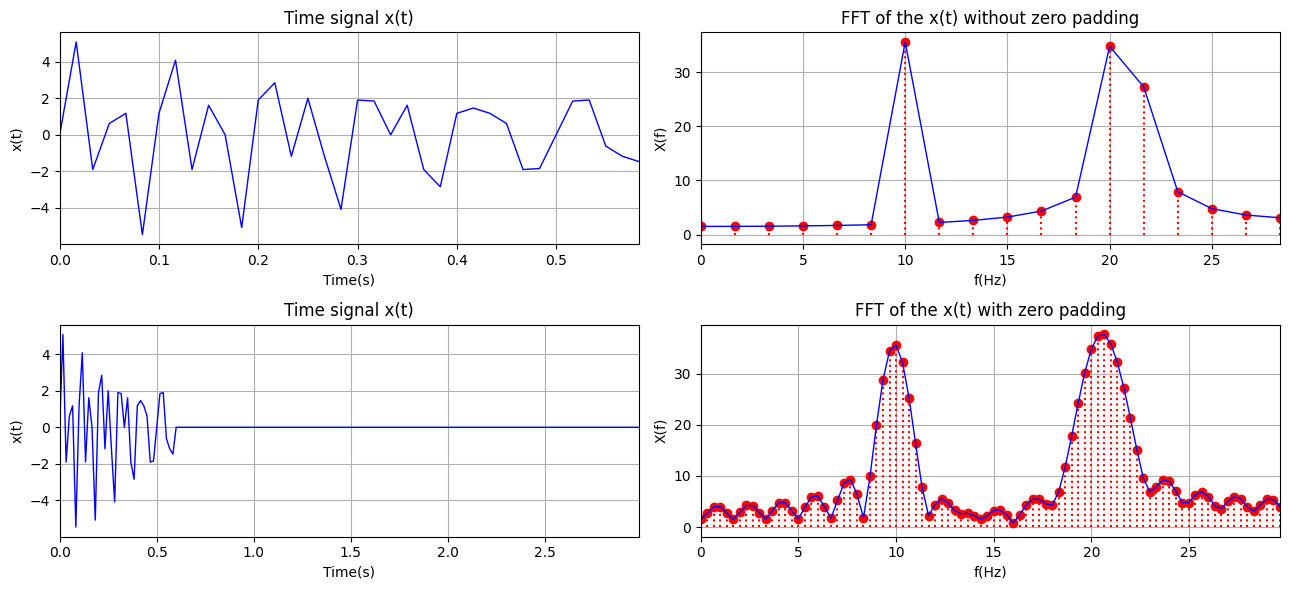

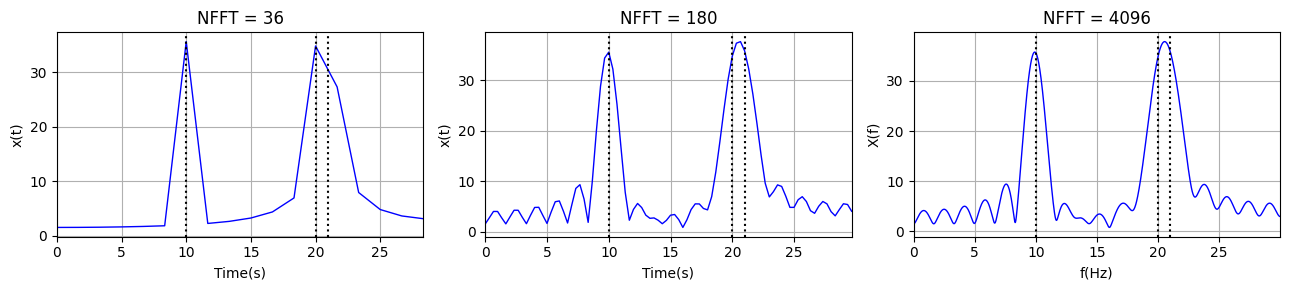

In [104]:
import numpy as np
import matplotlib.pyplot as plt

def rect_signal(T, fs):

    f1, f2, f3 = 10, 20, 21 # three frequency components in x(t)

    t = np.arange(0, T, 1/fs)
    x = 2*np.sin(2*np.pi*f1*t) + 2*np.sin(2*np.pi*f2*t) + 2*np.sin(2*np.pi*f3*t)\
    
    return x, t
            
def rect_window_fft(x, Nf):
    
    N = len(x)

    wrect = np.ones(N) # rectangular window
    xrect = x * wrect
    
    if Nf==0: Nf = N

    X = np.fft.fft(xrect, Nf)
    f = fs * np.arange(Nf) / Nf

    return X, f, Nf

T = 0.6
fs = 60

# No zero padding
x1, t1 = rect_signal(T,fs)
Xf1, f1, N1 = rect_window_fft(x1, 0)

# With zero padding
T0 = 2.4 # append 2.4 seconds of zeros to the end of the signal

x2 = np.pad(x1, (0, round(fs*T0)))
t2 = np.arange(0, T+T0, 1/fs)

Xf2, f2, N2 = rect_window_fft(x2, 0)

# FFT using a function (appending zeros in the function)
Xf3, f3, N3 = rect_window_fft(x1, 4096)

# Effect of zero-padding
plt.figure(figsize=(13, 6))

plt.subplot(221)
plt.plot(t1, x1, 'b', linewidth=1)
plt.title('Time signal x(t)')
plt.ylabel('x(t)')
plt.xlabel('Time(s)')
plt.grid(True)
plt.autoscale(enable=True, axis='x', tight=True)

plt.subplot(222)
plt.title('FFT of the x(t) without zero padding')
plt.stem(f1[0:(N1+1)//2], np.abs(Xf1[0:(N1+1)//2]), linefmt='r:', markerfmt='o', basefmt=' ')
plt.plot(f1[0:(N1+1)//2], np.abs(Xf1[0:(N1+1)//2]), 'b', linewidth=1)
plt.ylabel('X(f)')
plt.xlabel('f(Hz)')
plt.grid(True)
plt.autoscale(enable=True, axis='x', tight=True)

plt.subplot(223)
plt.plot(t2, x2, 'b', linewidth=1)
plt.title('Time signal x(t)')
plt.ylabel('x(t)')
plt.xlabel('Time(s)')
plt.grid(True)
plt.autoscale(enable=True, axis='x', tight=True)

plt.subplot(224)
plt.title('FFT of the x(t) with zero padding')
plt.stem(f2[0:(N2+1)//2], np.abs(Xf2[0:(N2+1)//2]), linefmt='r:', markerfmt='o', basefmt=' ')
plt.plot(f2[0:(N2+1)//2], np.abs(Xf2[0:(N2+1)//2]), 'b', linewidth=1)
plt.ylabel('X(f)')
plt.xlabel('f(Hz)')
plt.grid(True)
plt.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()

# Comparison of Frequency Signals Depending on the number of FFT 
plt.figure(figsize=(13, 3))

plt.subplot(131)
plt.title('NFFT = %d' % N1)
plt.plot(f1[0:(N1+1)//2], np.abs(Xf1[0:(N1+1)//2]), 'b', linewidth=1)
plt.axvline(x=10, color='k', linestyle=':')
plt.axvline(x=20, color='k', linestyle=':')
plt.axvline(x=21, color='k', linestyle=':')
plt.ylabel('x(t)')
plt.xlabel('Time(s)')
plt.grid(True)
plt.autoscale(enable=True, axis='x', tight=True)

plt.subplot(132)
plt.title('NFFT = %d' % N2)
plt.plot(f2[0:(N2+1)//2], np.abs(Xf2[0:(N2+1)//2]), 'b', linewidth=1)
plt.axvline(x=10, color='k', linestyle=':')
plt.axvline(x=20, color='k', linestyle=':')
plt.axvline(x=21, color='k', linestyle=':')
plt.ylabel('x(t)')
plt.xlabel('Time(s)')
plt.grid(True)
plt.autoscale(enable=True, axis='x', tight=True)

plt.subplot(133)
plt.title('NFFT = %d' % N3)
plt.plot(f3[0:(N3+1)//2], np.abs(Xf3[0:(N3+1)//2]), 'b', linewidth=1)
plt.axvline(x=10, color='k', linestyle=':')
plt.axvline(x=20, color='k', linestyle=':')
plt.axvline(x=21, color='k', linestyle=':')
plt.ylabel('X(f)')
plt.xlabel('f(Hz)')
plt.grid(True)
plt.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()



# Zero-padding (near resonance)

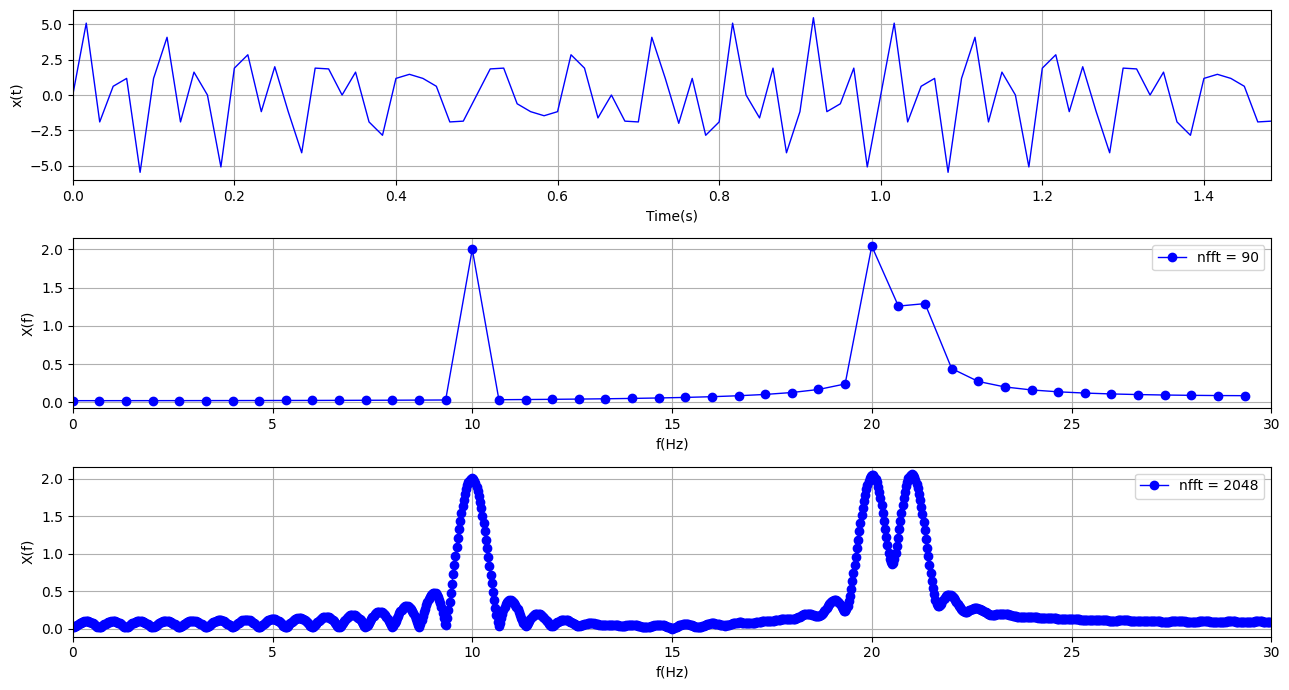

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Define signal parameters
f1, f2, f3 = 10, 20, 21
fs = 60  # sampling frequency
T = 1.5
t = np.arange(0, T, 1/fs)
x = 2 * np.sin(2 * np.pi * f1 * t) + 2 * np.sin(2 * np.pi * f2 * t) + 2 * np.sin(2 * np.pi * f3 * t)

# Window the signal with a rectangular window
N = len(x)
wrect = np.ones(N)  # In numpy, a rectangular window is just an array of ones
xrect = x * wrect

# Compute FFT
X1 = np.fft.fft(xrect)
f1_values = np.fft.fftfreq(N, 1/fs)

# Create the figure and set its size
fig2 = plt.figure(figsize=(13, 7))

# Plot time-domain signal
plt.subplot(311)
plt.plot(t, x, 'b', linewidth=1)
plt.ylabel('x(t)')
plt.xlabel('Time(s)')
plt.grid(True)
plt.autoscale(enable=True, axis='x', tight=True)

# Plot frequency spectrum for N point FFT
plt.subplot(312)
plt.plot(f1_values[:N//2], 2 * np.abs(X1[:N//2]) / fs / T, '-ob', linewidth=1)
plt.ylabel('X(f)')
plt.xlabel('f(Hz)')
plt.legend([f'nfft = {N}'])
plt.xlim(0, fs/2)
plt.grid(True)


# Compute FFT with zero-padding
nfft = 2048
X2 = np.fft.fft(xrect, nfft)
f2_values = np.fft.fftfreq(nfft, 1/fs)

# Plot frequency spectrum for zero-padded FFT
plt.subplot(313)
plt.plot(f2_values[:nfft//2], 2 * np.abs(X2[:nfft//2]) / fs / T, '-ob', linewidth=1)
plt.ylabel('X(f)')
plt.xlabel('f(Hz)')
plt.legend([f'nfft = {nfft}'])
plt.xlim(0, fs/2)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
